Essential Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

Mount the drive

In [ ]:
%cd ..
from google.colab import drive
drive.mount('./content/gdrive')

/
Mounted at ./content/gdrive


The data directory

In [ ]:
DATADIR = "/content/gdrive/MyDrive/Gait_analysis/all_fixed/data_150"

Classes

In [ ]:
CATEGORIES = ["normal_resized150", "abnormal_resized150"]

To create training data and labels from the data directory

In [ ]:
# To make the training data and labels from the datadir and categories
IMG_SIZE = 64
training_data = []
labels = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append(new_array)
            
            if "abnormal_resized150" in category:
                labels.append(0)
            else:
                labels.append(1)
           # except Exception as e:
            #    pass

create_training_data()

Changing the type of training data from list to numpy array

In [ ]:
# Reshaping the images as 1D array because the model takes images
# as 1D array. Also made the labels a numpy array.

X = np.array(training_data).reshape(len(training_data), 4096).astype(float)
y = np.array(labels)

In [ ]:
X.shape

(276, 4096)

Scaling i.e. changing the image values from 0-255 to 0-1

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

In [ ]:
X.shape

(276, 4096)

Applying PCA to keep only the most important features 

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(0.95)
X_pca = pca.fit_transform(X)
X_pca.shape

(276, 96)

In [ ]:
# pca.explained_variance_ratio_

In [ ]:
pca.n_components_

96

In [ ]:
#X_pca

Spliting in train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, train_size = 0.7, random_state = 0)

#ML models comparison with and without PCA

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lrwithoutPCA = LogisticRegression(max_iter=1000)
lrwithoutPCA.fit(X_train, y_train)
print("The score without PCA is:", lrwithoutPCA.score(X_test, y_test))
y_pred = lrwithoutPCA.predict(X_test)

The score without PCA is: 1.0


In [ ]:
lrwithPCA = LogisticRegression(max_iter=1000)
lrwithPCA.fit(X_train_pca, y_train)
print("The score with PCA is:", lrwithPCA.score(X_test_pca, y_test))
y_pred_PCA = lrwithPCA.predict(X_test_pca)

The score with PCA is: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        39

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



Text(15.0, 0.5, 'Truth')

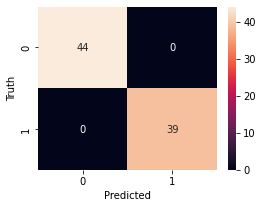

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_PCA))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_PCA)
cm

# Let's view a more asthetic confusion matrix

import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Decision Tree

In [ ]:
dtwithoutPCA = tree.DecisionTreeClassifier(criterion = "entropy", splitter = "best")
dtwithoutPCA.fit(X_train, y_train)
print("The score without PCA is:", dtwithoutPCA.score(X_test, y_test))
y_pred = dtwithoutPCA.predict(X_test)

The score without PCA is: 0.9518072289156626


In [ ]:
dtwithPCA = tree.DecisionTreeClassifier(criterion = "entropy", splitter = "best")
dtwithPCA.fit(X_train_pca, y_train)
print("The score with PCA is:", dtwithPCA.score(X_test_pca, y_test))
y_pred_PCA = dtwithPCA.predict(X_test_pca)

The score with PCA is: 0.8554216867469879


              precision    recall  f1-score   support

           0       0.83      0.91      0.87        44
           1       0.89      0.79      0.84        39

    accuracy                           0.86        83
   macro avg       0.86      0.85      0.85        83
weighted avg       0.86      0.86      0.85        83



Text(15.0, 0.5, 'Truth')

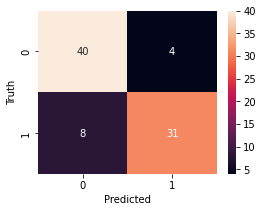

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_PCA))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_PCA)
cm

# Let's view a more asthetic confusion matrix

import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Support Vector Machine

In [ ]:
svmwithoutPCA = SVC()
svmwithoutPCA.fit(X_train, y_train)
print("The score without PCA is:", svmwithoutPCA.score(X_test, y_test))
y_pred = svmwithoutPCA.predict(X_test)

The score without PCA is: 1.0


In [ ]:
svmwithPCA = SVC()
svmwithPCA.fit(X_train_pca, y_train)
print("The score with PCA is:", svmwithPCA.score(X_test_pca, y_test))
y_pred_PCA = svmwithPCA.predict(X_test_pca)

The score with PCA is: 1.0


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        44
           1       1.00      1.00      1.00        39

    accuracy                           1.00        83
   macro avg       1.00      1.00      1.00        83
weighted avg       1.00      1.00      1.00        83



Text(15.0, 0.5, 'Truth')

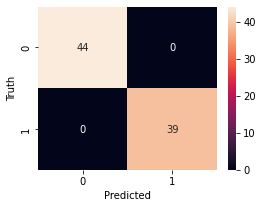

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_PCA))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_PCA)
cm

# Let's view a more asthetic confusion matrix

import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Random Forest

In [ ]:
rfwithoutPCA = RandomForestClassifier(n_estimators=20, random_state = 3)
rfwithoutPCA.fit(X_train, y_train)
print("The score without PCA is:", rfwithoutPCA.score(X_test, y_test))
y_pred = rfwithoutPCA.predict(X_test)

The score with PCA is: 1.0


In [ ]:
rfwithPCA = RandomForestClassifier(n_estimators=20, random_state = 3)
rfwithPCA.fit(X_train_pca, y_train)
print("The score with PCA is:", rfwithPCA.score(X_test_pca, y_test))
y_pred_PCA = rfwithPCA.predict(X_test_pca)

The score with PCA is: 0.8313253012048193


              precision    recall  f1-score   support

           0       0.83      0.86      0.84        44
           1       0.84      0.79      0.82        39

    accuracy                           0.83        83
   macro avg       0.83      0.83      0.83        83
weighted avg       0.83      0.83      0.83        83



Text(15.0, 0.5, 'Truth')

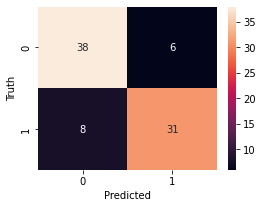

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_PCA))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_PCA)
cm

# Let's view a more asthetic confusion matrix

import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

Naive Bayes

In [ ]:
nbwithoutPCA = GaussianNB()
nbwithoutPCA.fit(X_train, y_train)
print("The score without PCA is:", nbwithoutPCA.score(X_test, y_test))
y_pred = nbwithoutPCA.predict(X_test)

The score without PCA is: 0.7831325301204819


In [ ]:
nbwithPCA = GaussianNB()
nbwithPCA.fit(X_train_pca, y_train)
print("The score with PCA is:", nbwithPCA.score(X_test_pca, y_test))
y_pred_PCA = nbwithPCA.predict(X_test_pca)

The score with PCA is: 0.9156626506024096


              precision    recall  f1-score   support

           0       0.93      0.91      0.92        44
           1       0.90      0.92      0.91        39

    accuracy                           0.92        83
   macro avg       0.92      0.92      0.92        83
weighted avg       0.92      0.92      0.92        83



Text(15.0, 0.5, 'Truth')

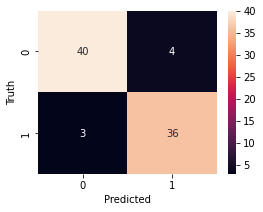

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_PCA))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_PCA)
cm

# Let's view a more asthetic confusion matrix

import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

K Nearest Neighbour

In [ ]:
knnwithoutPCA = KNeighborsClassifier(n_neighbors=2)
knnwithoutPCA.fit(X_train, y_train)
print("The score without PCA is:", knnwithoutPCA.score(X_test, y_test))
y_pred = knnwithoutPCA.predict(X_test)

The score without PCA is: 0.9518072289156626


In [ ]:
knnwithPCA = KNeighborsClassifier(n_neighbors=2)
knnwithPCA.fit(X_train_pca, y_train)
print("The score with PCA is:", knnwithPCA.score(X_test_pca, y_test))
y_pred_PCA = knnwithPCA.predict(X_test_pca)

The score with PCA is: 0.9518072289156626


              precision    recall  f1-score   support

           0       0.92      1.00      0.96        44
           1       1.00      0.90      0.95        39

    accuracy                           0.95        83
   macro avg       0.96      0.95      0.95        83
weighted avg       0.96      0.95      0.95        83



Text(15.0, 0.5, 'Truth')

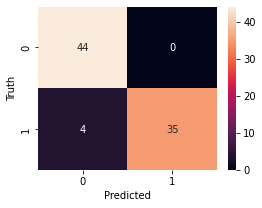

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_PCA))

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_PCA)
cm

# Let's view a more asthetic confusion matrix

import seaborn as sn
plt.figure(figsize = (4, 3))
sn.heatmap(cm, annot= True)
plt.xlabel("Predicted")
plt.ylabel("Truth")

In [ ]:
# predict with the trained model 
# n = 25
# labels = ["abnormal gait","normal gait"]
# sample_image = X_test[n]
# sample_label = y_test[n]
# predicted_label = y_pred[n]
# lrwithoutPCA.predict([sample_image])
# print("The true label says it is a", labels[predicted_label])
# print("The model predicted it to be a", labels[sample_label])




# To see the predicted image, we need to change the 1D array to 2D array

# example = np.reshape(sample_image, (64, 64))
# plt.imshow(example, cmap = "gray")
# plt.xlabel(labels[sample_label])
# plt.show()

Explained Vairance Graph

In [ ]:
# To make the training data and labels from the datadir and categories
IMG_SIZE = 64
training_data = []
labels = []

CATEGORIES = ["normal_resized150", "abnormal_resized150"]
DATADIR = "/content/drive/MyDrive/Gait_analysis/all_fixed/data_150"

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append(new_array)
            
            if "abnormal_resized150" in category:
                labels.append(0)
            else:
                labels.append(1)
           # except Exception as e:
            #    pass

create_training_data()

In [ ]:
X = np.array(training_data).reshape(len(training_data), 4096).astype(float)
y = np.array(labels)

In [ ]:
X.shape

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

In [ ]:
#
# Scale the dataset; This is very important before you apply PCA
#
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

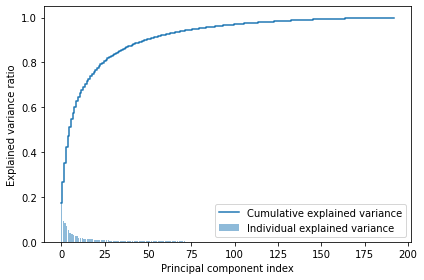